In [3]:
import librosa
from pathlib import Path
import matplotlib.pyplot as plt
import librosa.display
import numpy as np

from mutagen.wave import WAVE
import taglib

import re

from unicodedata import normalize
import codecs
import pandas as pd

In [4]:
# 1. Get the file path to an included audio example
path_folder = Path("../../../data/")
path_audio = Path(path_folder, "Instr_34_Smp_00.wav")
y, sr = librosa.load(path_audio)

In [5]:
audio = WAVE(path_audio)
audio.tags.getall(key="GEOB:com.native-instruments.nks.soundinfo")
audio.tags

{'GEOB:com.native-instruments.uuid': GEOB(encoding=<Encoding.LATIN1: 0>, mime='', filename='', desc='com.native-instruments.uuid', data=b'87438641-d86d-346d-cbd7-211b3740cfd8'), 'GEOB:com.native-instruments.nks.soundinfo': GEOB(encoding=<Encoding.LATIN1: 0>, mime='', filename='', desc='com.native-instruments.nks.soundinfo', data=b'\x88\xad__ni_internal\x81\xa6source\xa5other\xa6author\xa0\xa7comment\xa0\xa5modes\xdc\x00L\xa3909\xa8Acoustic\xa8Additive\xa4Airy\xa6Analog\xabArpeggiated\xa4Bass\xa5Bongo\xa6Bright\xa5Chord\xa5Clean\xa5Conga\xa5Crash\xa4Dark\xa4Deep\xa7Digital\xa5Dirty\xa9Distorted\xa5Drums\xa3Dry\xa8Electric\xa8Evolving\xa2FM\xa8Filtered\xb1Glide / Pitch Mod\xa8Granular\xa6Guitar\xaeHip Hop / Trap\xa4Huge\xa5Human\xa4Keys\xa7Layered\xa4Lead\xa4Lick\xa5Lo-Fi\xacLong Release\xa4Male\xa6Mallet\xa7Melodic\xa8Metallic\xa6Mixbus\xaaMonophonic\xa4Pads\xa5Pedal\xaaPercussive\xaePhysical Model\xa5Piano\xa6Plucks\xa9Processed\xa4Ride\xa9Ride Bell\xa7Rimshot\xa5Riser\xa4Roll\xacSampl

In [14]:
tags = audio.tags.getall(key="GEOB:com.native-instruments.nks.soundinfo")[0].data
tags_decoded = tags.decode('ascii', 'backslashreplace')
# normalize('NFKD', tags)
tags_decoded

'\\x88\\xad__ni_internal\\x81\\xa6source\\xa5other\\xa6author\\xa0\\xa7comment\\xa0\\xa5modes\\xdc\x00L\\xa3909\\xa8Acoustic\\xa8Additive\\xa4Airy\\xa6Analog\\xabArpeggiated\\xa4Bass\\xa5Bongo\\xa6Bright\\xa5Chord\\xa5Clean\\xa5Conga\\xa5Crash\\xa4Dark\\xa4Deep\\xa7Digital\\xa5Dirty\\xa9Distorted\\xa5Drums\\xa3Dry\\xa8Electric\\xa8Evolving\\xa2FM\\xa8Filtered\\xb1Glide / Pitch Mod\\xa8Granular\\xa6Guitar\\xaeHip Hop / Trap\\xa4Huge\\xa5Human\\xa4Keys\\xa7Layered\\xa4Lead\\xa4Lick\\xa5Lo-Fi\\xacLong Release\\xa4Male\\xa6Mallet\\xa7Melodic\\xa8Metallic\\xa6Mixbus\\xaaMonophonic\\xa4Pads\\xa5Pedal\\xaaPercussive\\xaePhysical Model\\xa5Piano\\xa6Plucks\\xa9Processed\\xa4Ride\\xa9Ride Bell\\xa7Rimshot\\xa5Riser\\xa4Roll\\xacSample-based\\xb2Sequenced / Looped\\xaaSide Stick\\xabSlow Attack\\xa4Snap\\xaaSpecial FX\\xacStabs & Hits\\xa7Strings\\xa3Sub\\xa8Surround\\xa5Synth\\xa9Synthetic\\xaaTambourine\\xacTempo-synced\\xa8Triangle\\xa7Various\\xa5Vinyl\\xa5Vocal\\xa7Vocoded\\xa3Wet\\xa4Wood\

In [15]:
tags

b'\x88\xad__ni_internal\x81\xa6source\xa5other\xa6author\xa0\xa7comment\xa0\xa5modes\xdc\x00L\xa3909\xa8Acoustic\xa8Additive\xa4Airy\xa6Analog\xabArpeggiated\xa4Bass\xa5Bongo\xa6Bright\xa5Chord\xa5Clean\xa5Conga\xa5Crash\xa4Dark\xa4Deep\xa7Digital\xa5Dirty\xa9Distorted\xa5Drums\xa3Dry\xa8Electric\xa8Evolving\xa2FM\xa8Filtered\xb1Glide / Pitch Mod\xa8Granular\xa6Guitar\xaeHip Hop / Trap\xa4Huge\xa5Human\xa4Keys\xa7Layered\xa4Lead\xa4Lick\xa5Lo-Fi\xacLong Release\xa4Male\xa6Mallet\xa7Melodic\xa8Metallic\xa6Mixbus\xaaMonophonic\xa4Pads\xa5Pedal\xaaPercussive\xaePhysical Model\xa5Piano\xa6Plucks\xa9Processed\xa4Ride\xa9Ride Bell\xa7Rimshot\xa5Riser\xa4Roll\xacSample-based\xb2Sequenced / Looped\xaaSide Stick\xabSlow Attack\xa4Snap\xaaSpecial FX\xacStabs & Hits\xa7Strings\xa3Sub\xa8Surround\xa5Synth\xa9Synthetic\xaaTambourine\xacTempo-synced\xa8Triangle\xa7Various\xa5Vinyl\xa5Vocal\xa7Vocoded\xa3Wet\xa4Wood\xabin progress\xa4name\xafInstr_34_Smp_00\xa5tempo\xcb\x00\x00\x00\x00\x00\x00\x00\x0

In [31]:
# re.split(r'(\x04\x0b)(.*)(\x04)([*]?)(.*)(\x02\x01)(\r?)(.*)(\x12)(.*)(\x12)(.*)(\x01\01)(.*)', tags)
re.split(r'(\\x[a-z0-9][a-z0-9])(.*)(\\x[a-z0-9][a-z0-9])', tags_decoded)[1:]

['\\x88',
 '\\xad__ni_internal\\x81\\xa6source\\xa5other\\xa6author\\xa0\\xa7comment\\xa0\\xa5modes\\xdc\x00L\\xa3909\\xa8Acoustic\\xa8Additive\\xa4Airy\\xa6Analog\\xabArpeggiated\\xa4Bass\\xa5Bongo\\xa6Bright\\xa5Chord\\xa5Clean\\xa5Conga\\xa5Crash\\xa4Dark\\xa4Deep\\xa7Digital\\xa5Dirty\\xa9Distorted\\xa5Drums\\xa3Dry\\xa8Electric\\xa8Evolving\\xa2FM\\xa8Filtered\\xb1Glide / Pitch Mod\\xa8Granular\\xa6Guitar\\xaeHip Hop / Trap\\xa4Huge\\xa5Human\\xa4Keys\\xa7Layered\\xa4Lead\\xa4Lick\\xa5Lo-Fi\\xacLong Release\\xa4Male\\xa6Mallet\\xa7Melodic\\xa8Metallic\\xa6Mixbus\\xaaMonophonic\\xa4Pads\\xa5Pedal\\xaaPercussive\\xaePhysical Model\\xa5Piano\\xa6Plucks\\xa9Processed\\xa4Ride\\xa9Ride Bell\\xa7Rimshot\\xa5Riser\\xa4Roll\\xacSample-based\\xb2Sequenced / Looped\\xaaSide Stick\\xabSlow Attack\\xa4Snap\\xaaSpecial FX\\xacStabs & Hits\\xa7Strings\\xa3Sub\\xa8Surround\\xa5Synth\\xa9Synthetic\\xaaTambourine\\xacTempo-synced\\xa8Triangle\\xa7Various\\xa5Vinyl\\xa5Vocal\\xa7Vocoded\\xa3Wet\\xa

In [47]:
def splitTags(string, depth = 0):
    pattern = r'(\\x[a-z0-9][a-z0-9])(.*)(\\x[a-z0-9][a-z0-9])'

    split = re.split(pattern, string)[1:]
    print()

    nextSplit = re.split(pattern, split[1])[1:]
    print(nextSplit)

    # if(re.split(pattern, split)[0] != ""):
    #     splitTags(nextSplit[1])
    

In [48]:
splitTags(tags_decoded)

['\\x88', '\\xad__ni_internal\\x81\\xa6source\\xa5other\\xa6author\\xa0\\xa7comment\\xa0\\xa5modes\\xdc\x00L\\xa3909\\xa8Acoustic\\xa8Additive\\xa4Airy\\xa6Analog\\xabArpeggiated\\xa4Bass\\xa5Bongo\\xa6Bright\\xa5Chord\\xa5Clean\\xa5Conga\\xa5Crash\\xa4Dark\\xa4Deep\\xa7Digital\\xa5Dirty\\xa9Distorted\\xa5Drums\\xa3Dry\\xa8Electric\\xa8Evolving\\xa2FM\\xa8Filtered\\xb1Glide / Pitch Mod\\xa8Granular\\xa6Guitar\\xaeHip Hop / Trap\\xa4Huge\\xa5Human\\xa4Keys\\xa7Layered\\xa4Lead\\xa4Lick\\xa5Lo-Fi\\xacLong Release\\xa4Male\\xa6Mallet\\xa7Melodic\\xa8Metallic\\xa6Mixbus\\xaaMonophonic\\xa4Pads\\xa5Pedal\\xaaPercussive\\xaePhysical Model\\xa5Piano\\xa6Plucks\\xa9Processed\\xa4Ride\\xa9Ride Bell\\xa7Rimshot\\xa5Riser\\xa4Roll\\xacSample-based\\xb2Sequenced / Looped\\xaaSide Stick\\xabSlow Attack\\xa4Snap\\xaaSpecial FX\\xacStabs & Hits\\xa7Strings\\xa3Sub\\xa8Surround\\xa5Synth\\xa9Synthetic\\xaaTambourine\\xacTempo-synced\\xa8Triangle\\xa7Various\\xa5Vinyl\\xa5Vocal\\xa7Vocoded\\xa3Wet\\xa4

In [18]:
with taglib.File(path_audio, save_on_exit=True) as song:
    print(song.length)

0


/home/stefan/Development/audiosampleagent/.venv/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=751
  warnings.warn(
/home/stefan/Development/audiosampleagent/.venv/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=376
  warnings.warn(
/home/stefan/Development/audiosampleagent/.venv/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=188
  warnings.warn(


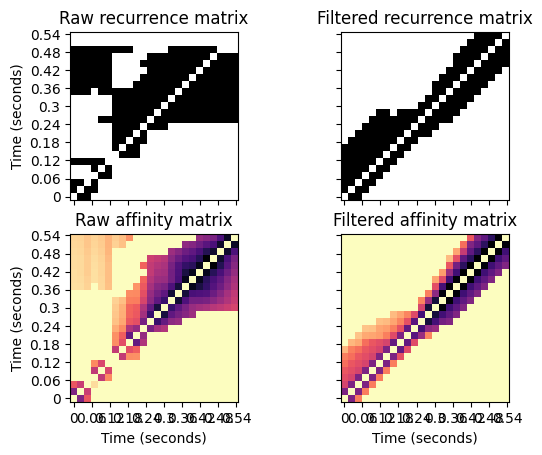

In [38]:
chroma = librosa.feature.chroma_cqt(y=y, sr=sr)
chroma_stack = librosa.feature.stack_memory(chroma, n_steps=3, delay=3)
rec = librosa.segment.recurrence_matrix(chroma_stack)
from scipy.ndimage import median_filter
diagonal_median = librosa.segment.timelag_filter(median_filter)
rec_filtered = diagonal_median(rec, size=(1, 31), mode='mirror')

rec_aff = librosa.segment.recurrence_matrix(chroma_stack, mode='affinity')
rec_aff_fil = diagonal_median(rec_aff, size=(1, 31), mode='mirror')

fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True)
librosa.display.specshow(rec, y_axis='s', x_axis='s', ax=ax[0, 0])
ax[0, 0].set(title='Raw recurrence matrix')
ax[0, 0].label_outer()
librosa.display.specshow(rec_filtered, y_axis='s', x_axis='s', ax=ax[0, 1])
ax[0, 1].set(title='Filtered recurrence matrix')
ax[0, 1].label_outer()
librosa.display.specshow(rec_aff, x_axis='s', y_axis='s',
                         cmap='magma_r', ax=ax[1, 0])
ax[1, 0].set(title='Raw affinity matrix')
librosa.display.specshow(rec_aff_fil, x_axis='s', y_axis='s',
                         cmap='magma_r', ax=ax[1, 1])
ax[1, 1].set(title='Filtered affinity matrix')
ax[1, 1].label_outer()

[Text(0.5, 1.0, 'Lag (no padding)')]

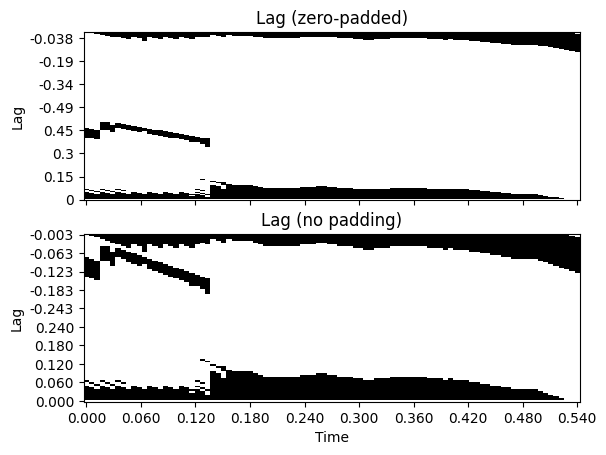

In [37]:
fig, ax = plt.subplots(nrows=2, sharex=True)
librosa.display.specshow(lag_pad, x_axis='time', y_axis='lag',
                         hop_length=hop_length, ax=ax[0])
ax[0].set(title='Lag (zero-padded)')
ax[0].label_outer()
librosa.display.specshow(lag_nopad, x_axis='time', y_axis='lag',
                         hop_length=hop_length, ax=ax[1])
ax[1].set(title='Lag (no padding)')

## Spectrogram

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

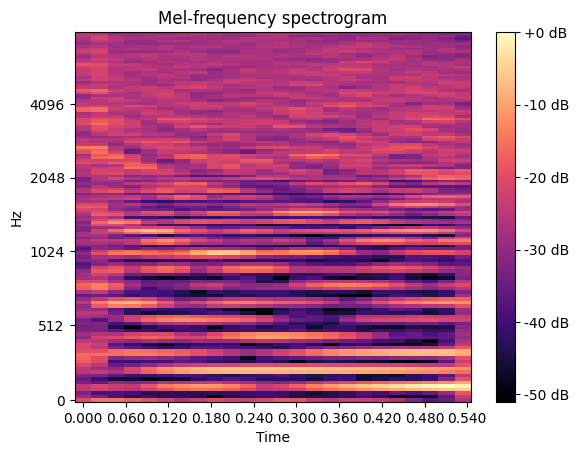

In [34]:
D = np.abs(librosa.stft(y))**2
S = librosa.feature.melspectrogram(S=D, sr=sr)

# Passing through arguments to the Mel filters
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,
                                   fmax=8000)

fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')